# CS381/780 Data Analytics Final Project - Test Performance Analysis 

## James Mancuso

## Spring 2021 semester

## Requirements

#### Predicting whether a student will under-perform

##### Use any one of the models (Logistic, SVM, Decision Tree and Random Forecast, Naïve Bayes) that we have covered in class. You only need to pick one.

##### The target variable is the “underperformance”

##### Math_G1 is the Grade after first grading period. It should be highly correlated with  the final grade (ie under performance or not), but it won’t be available at the beginning of the school term. So it may not be available yet.

##### You need to create 3 sets of models
• Without using either the Math_G1 and Language_G1
• Use both Math_G1 and Language_G1
• Use only Math_G1 but without Language_G1

##### You do NOT need to use ALL the variables in the dataset, but you should pick or have tried or investigated a good number of the variables.

##### Comment on your final model, explain whether the Language Grade will be helpful to catch underperformance in the final Math grade.

##### Grading will be based on whether you have done it “right”, not the actual performance of the final model

### Due on 5/19/2021 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an original student performance dataset provided on Kaggle

https://www.kaggle.com/impapan/student-performance-data-set


# Description of attributes:

1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
    


### I have modified the original dataset slightly, removed some attributes and include the first term grade from the language course


In [4]:
df = pd.read_csv("student_performance_modified.csv")
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,Math_FinalG3
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,6
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,6
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,10
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,15
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,10


In [5]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'famrel', 'freetime', 'Dalc', 'Walc', 'health',
       'Math_FinalG3'],
      dtype='object')

### First we replace the Math_FinalG3 by a binary label to indicate underperformance

In [6]:
df['underperformance'] = df['Math_FinalG3'].apply(lambda x: 1 if x < 9 else 0)
df = df.drop(['Math_FinalG3'], axis=1)
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,underperformance
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,1
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,1
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,0
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,0
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,0


### Your task in the final project is build the best predictive model to predict who would underperform in their final Math Grade so that the school can proactively find ways to help the students

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.

### Math_G1 is the Math Grade in first term and Language_G1 is the first term grade in language. Math_G1 should have a high correlation of the Student Final Math Grade. However, it won't be available at the beginning of the school year

### Therefore, you need to build two sets of models. One set is not to use these G1 varaibles, the others you could. Find out if the language grade will be useful or not in determining the final Math grade

### Make sure your work include the following steps

* EDA (checking missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


<AxesSubplot:xlabel='underperformance', ylabel='count'>

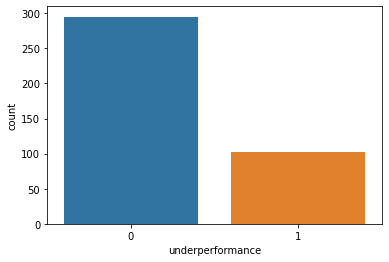

In [7]:
sns.countplot(df['underperformance'])

### Good Luck !!!

Show all your work below

# Task 1: EDA (checking missing values, removing outliers)

## Part A - Checking for missing values 

In [8]:
df.describe()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health,underperformance
count,396.000000,397.000000,397.000000,397.000000,397.000000,396.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.893939,1.450882,2.030227,0.332494,5.700252,10.919192,12.015113,2.748111,2.518892,3.944584,3.236776,1.483627,2.292191,3.554156,0.256927
std,4.136147,0.700455,0.840330,0.742149,7.988838,3.321359,2.418317,1.092688,1.086078,0.894400,0.997146,0.892086,1.289141,1.390885,0.437490
min,15.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,8.000000,10.000000,2.000000,2.000000,4.000000,3.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,11.000000,12.000000,3.000000,2.000000,4.000000,3.000000,1.000000,2.000000,4.000000,0.000000
75%,18.000000,2.000000,2.000000,0.000000,8.000000,13.000000,14.000000,4.000000,3.000000,5.000000,4.000000,2.000000,3.000000,5.000000,1.000000
max,95.000000,4.000000,4.000000,3.000000,75.000000,19.000000,18.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [9]:
df.shape

(397, 27)

In [10]:
df.isnull().any()

age                  True
traveltime          False
studytime           False
failures            False
absences            False
Math_G1              True
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

In [11]:
print(df['age'].mean())
print(df['age'].median())

16.893939393939394
17.0


In [12]:
df['age'].describe()

count    396.000000
mean      16.893939
std        4.136147
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       95.000000
Name: age, dtype: float64

In [13]:
df['age'] = df['age'].fillna(df['age'].median())

<AxesSubplot:>

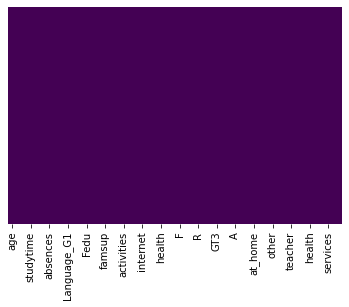

In [74]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
df['Math_G1'].describe()

count    396.000000
mean      10.919192
std        3.321359
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: Math_G1, dtype: float64

In [16]:
print(df['Math_G1'].mean())
print(df['Math_G1'].median())

10.919191919191919
11.0


In [17]:
df['Math_G1'] = df['Math_G1'].fillna(df['Math_G1'].mean())

In [18]:
df.isnull().any()

age                 False
traveltime          False
studytime           False
failures            False
absences            False
Math_G1             False
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

## Part B - Removing Outliers

<AxesSubplot:ylabel='age'>

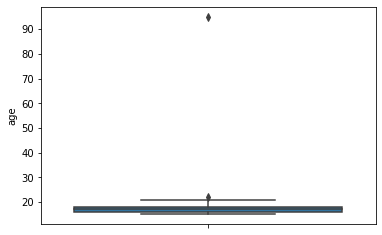

In [19]:
sns.boxplot(y = df['age'])

Based on the initial information given, we were told that the age range was between 15 to 22. Since that is the case, we will remove all ages > 22

In [20]:
df = df[df['age'] <= 22]

<AxesSubplot:ylabel='age'>

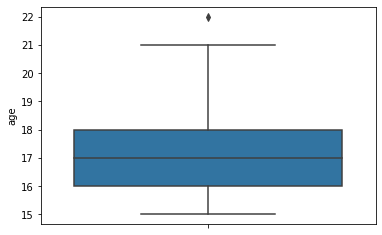

In [21]:
sns.boxplot(y = df['age'])

<AxesSubplot:ylabel='traveltime'>

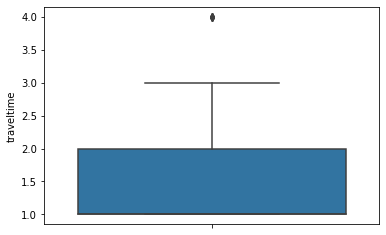

In [22]:
sns.boxplot(y = df['traveltime'])

<AxesSubplot:ylabel='studytime'>

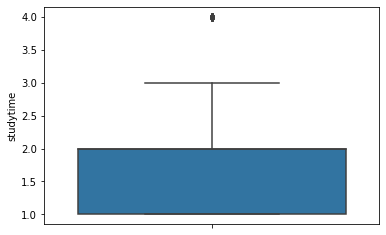

In [23]:
sns.boxplot(y = df['studytime'])

<AxesSubplot:ylabel='failures'>

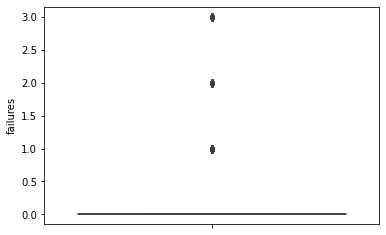

In [24]:
sns.boxplot(y = df['failures'])

<AxesSubplot:ylabel='absences'>

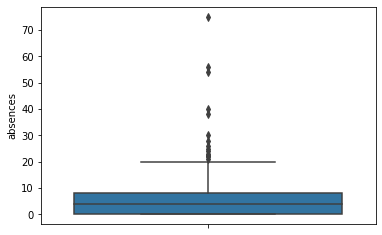

In [25]:
sns.boxplot(y = df['absences'])

<AxesSubplot:ylabel='Math_G1'>

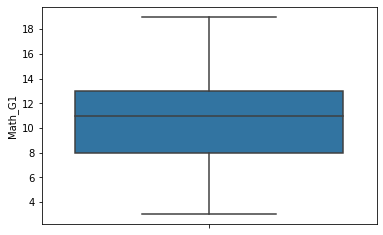

In [26]:
sns.boxplot(y = df['Math_G1'])

<AxesSubplot:ylabel='Language_G1'>

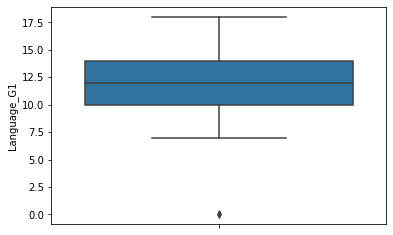

In [27]:
sns.boxplot(y = df['Language_G1'])

<AxesSubplot:ylabel='Medu'>

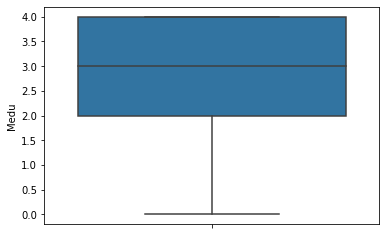

In [28]:
sns.boxplot(y = df['Medu'])

<AxesSubplot:ylabel='Fedu'>

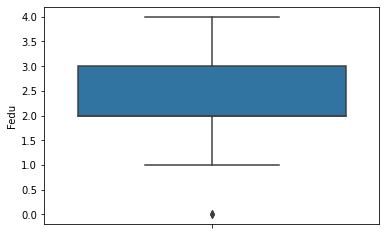

In [29]:
sns.boxplot(y = df['Fedu'])

<AxesSubplot:ylabel='famrel'>

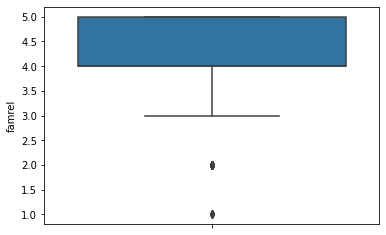

In [30]:
sns.boxplot(y = df['famrel'])

<AxesSubplot:ylabel='freetime'>

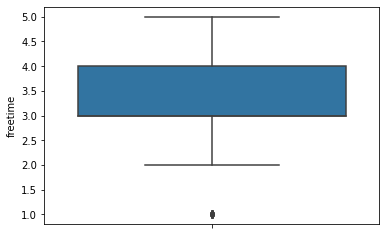

In [31]:
sns.boxplot(y = df['freetime'])

<AxesSubplot:ylabel='Dalc'>

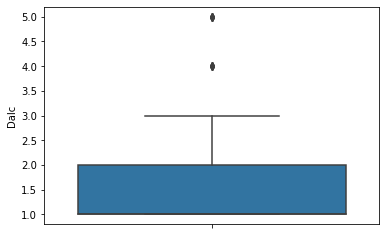

In [32]:
sns.boxplot(y = df['Dalc'])

<AxesSubplot:ylabel='Walc'>

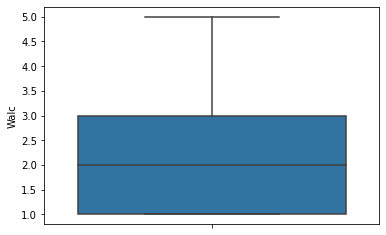

In [33]:
sns.boxplot(y = df['Walc'])

<AxesSubplot:ylabel='health'>

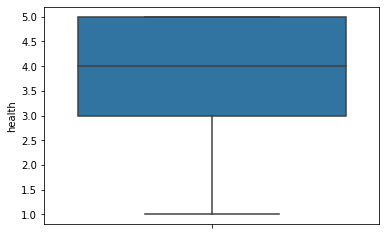

In [34]:
sns.boxplot(y = df['health'])

<AxesSubplot:ylabel='underperformance'>

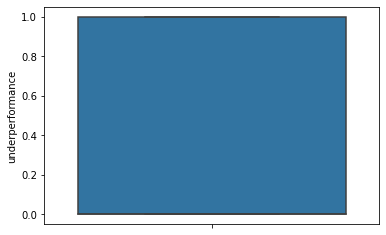

In [35]:
sns.boxplot(y = df['underperformance'])

# Task 2 - Performed basic exploration of relationship, with plots and graphs

In [36]:
df.corr()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health,underperformance
age,1.000000,0.071530,-0.004874,0.243315,0.174675,-0.064075,0.014953,-0.163498,-0.163668,0.053973,0.016882,0.131659,0.117805,-0.061472,0.131149
traveltime,0.071530,1.000000,-0.106983,0.089128,-0.016846,-0.092445,-0.047484,-0.169281,-0.159848,-0.016356,-0.012625,0.146474,0.140398,0.013256,0.065113
studytime,-0.004874,-0.106983,1.000000,-0.171785,-0.060317,0.160294,0.059647,0.064101,-0.007661,0.039461,-0.145202,-0.200223,-0.256862,-0.078605,-0.085019
failures,0.243315,0.089128,-0.171785,1.000000,0.064479,-0.354631,-0.113156,-0.236864,-0.249727,-0.044396,0.091026,0.133582,0.140105,0.064540,0.334668
absences,0.174675,-0.016846,-0.060317,0.064479,1.000000,-0.030989,0.035355,0.099800,0.025315,-0.044437,-0.059378,0.108360,0.133512,-0.031751,0.010241
Math_G1,-0.064075,-0.092445,0.160294,-0.354631,-0.030989,1.000000,0.314153,0.205329,0.190211,0.022169,0.012610,-0.093801,-0.125889,-0.073064,-0.636116
Language_G1,0.014953,-0.047484,0.059647,-0.113156,0.035355,0.314153,1.000000,0.114843,0.070189,0.008439,0.017872,-0.021024,-0.025311,-0.046083,-0.167367
Medu,-0.163498,-0.169281,0.064101,-0.236864,0.099800,0.205329,0.114843,1.000000,0.622955,-0.003878,0.031309,0.020745,-0.046248,-0.046209,-0.118979
Fedu,-0.163668,-0.159848,-0.007661,-0.249727,0.025315,0.190211,0.070189,0.622955,1.000000,-0.001445,-0.013760,0.000316,-0.014205,0.013458,-0.112011
famrel,0.053973,-0.016356,0.039461,-0.044396,-0.044437,0.022169,0.008439,-0.003878,-0.001445,1.000000,0.150709,-0.077043,-0.112937,0.094090,-0.034435


In [37]:
df.corr() > abs(.2)

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health,underperformance
age,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
traveltime,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
studytime,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
failures,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
absences,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Math_G1,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False
Language_G1,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
Medu,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False
Fedu,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
famrel,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [38]:
df.corr()['underperformance'].sort_values()

Math_G1            -0.636116
Language_G1        -0.167367
Medu               -0.118979
Fedu               -0.112011
studytime          -0.085019
famrel             -0.034435
Dalc                0.010008
absences            0.010241
Walc                0.021814
freetime            0.021938
health              0.037740
traveltime          0.065113
age                 0.131149
failures            0.334668
underperformance    1.000000
Name: underperformance, dtype: float64

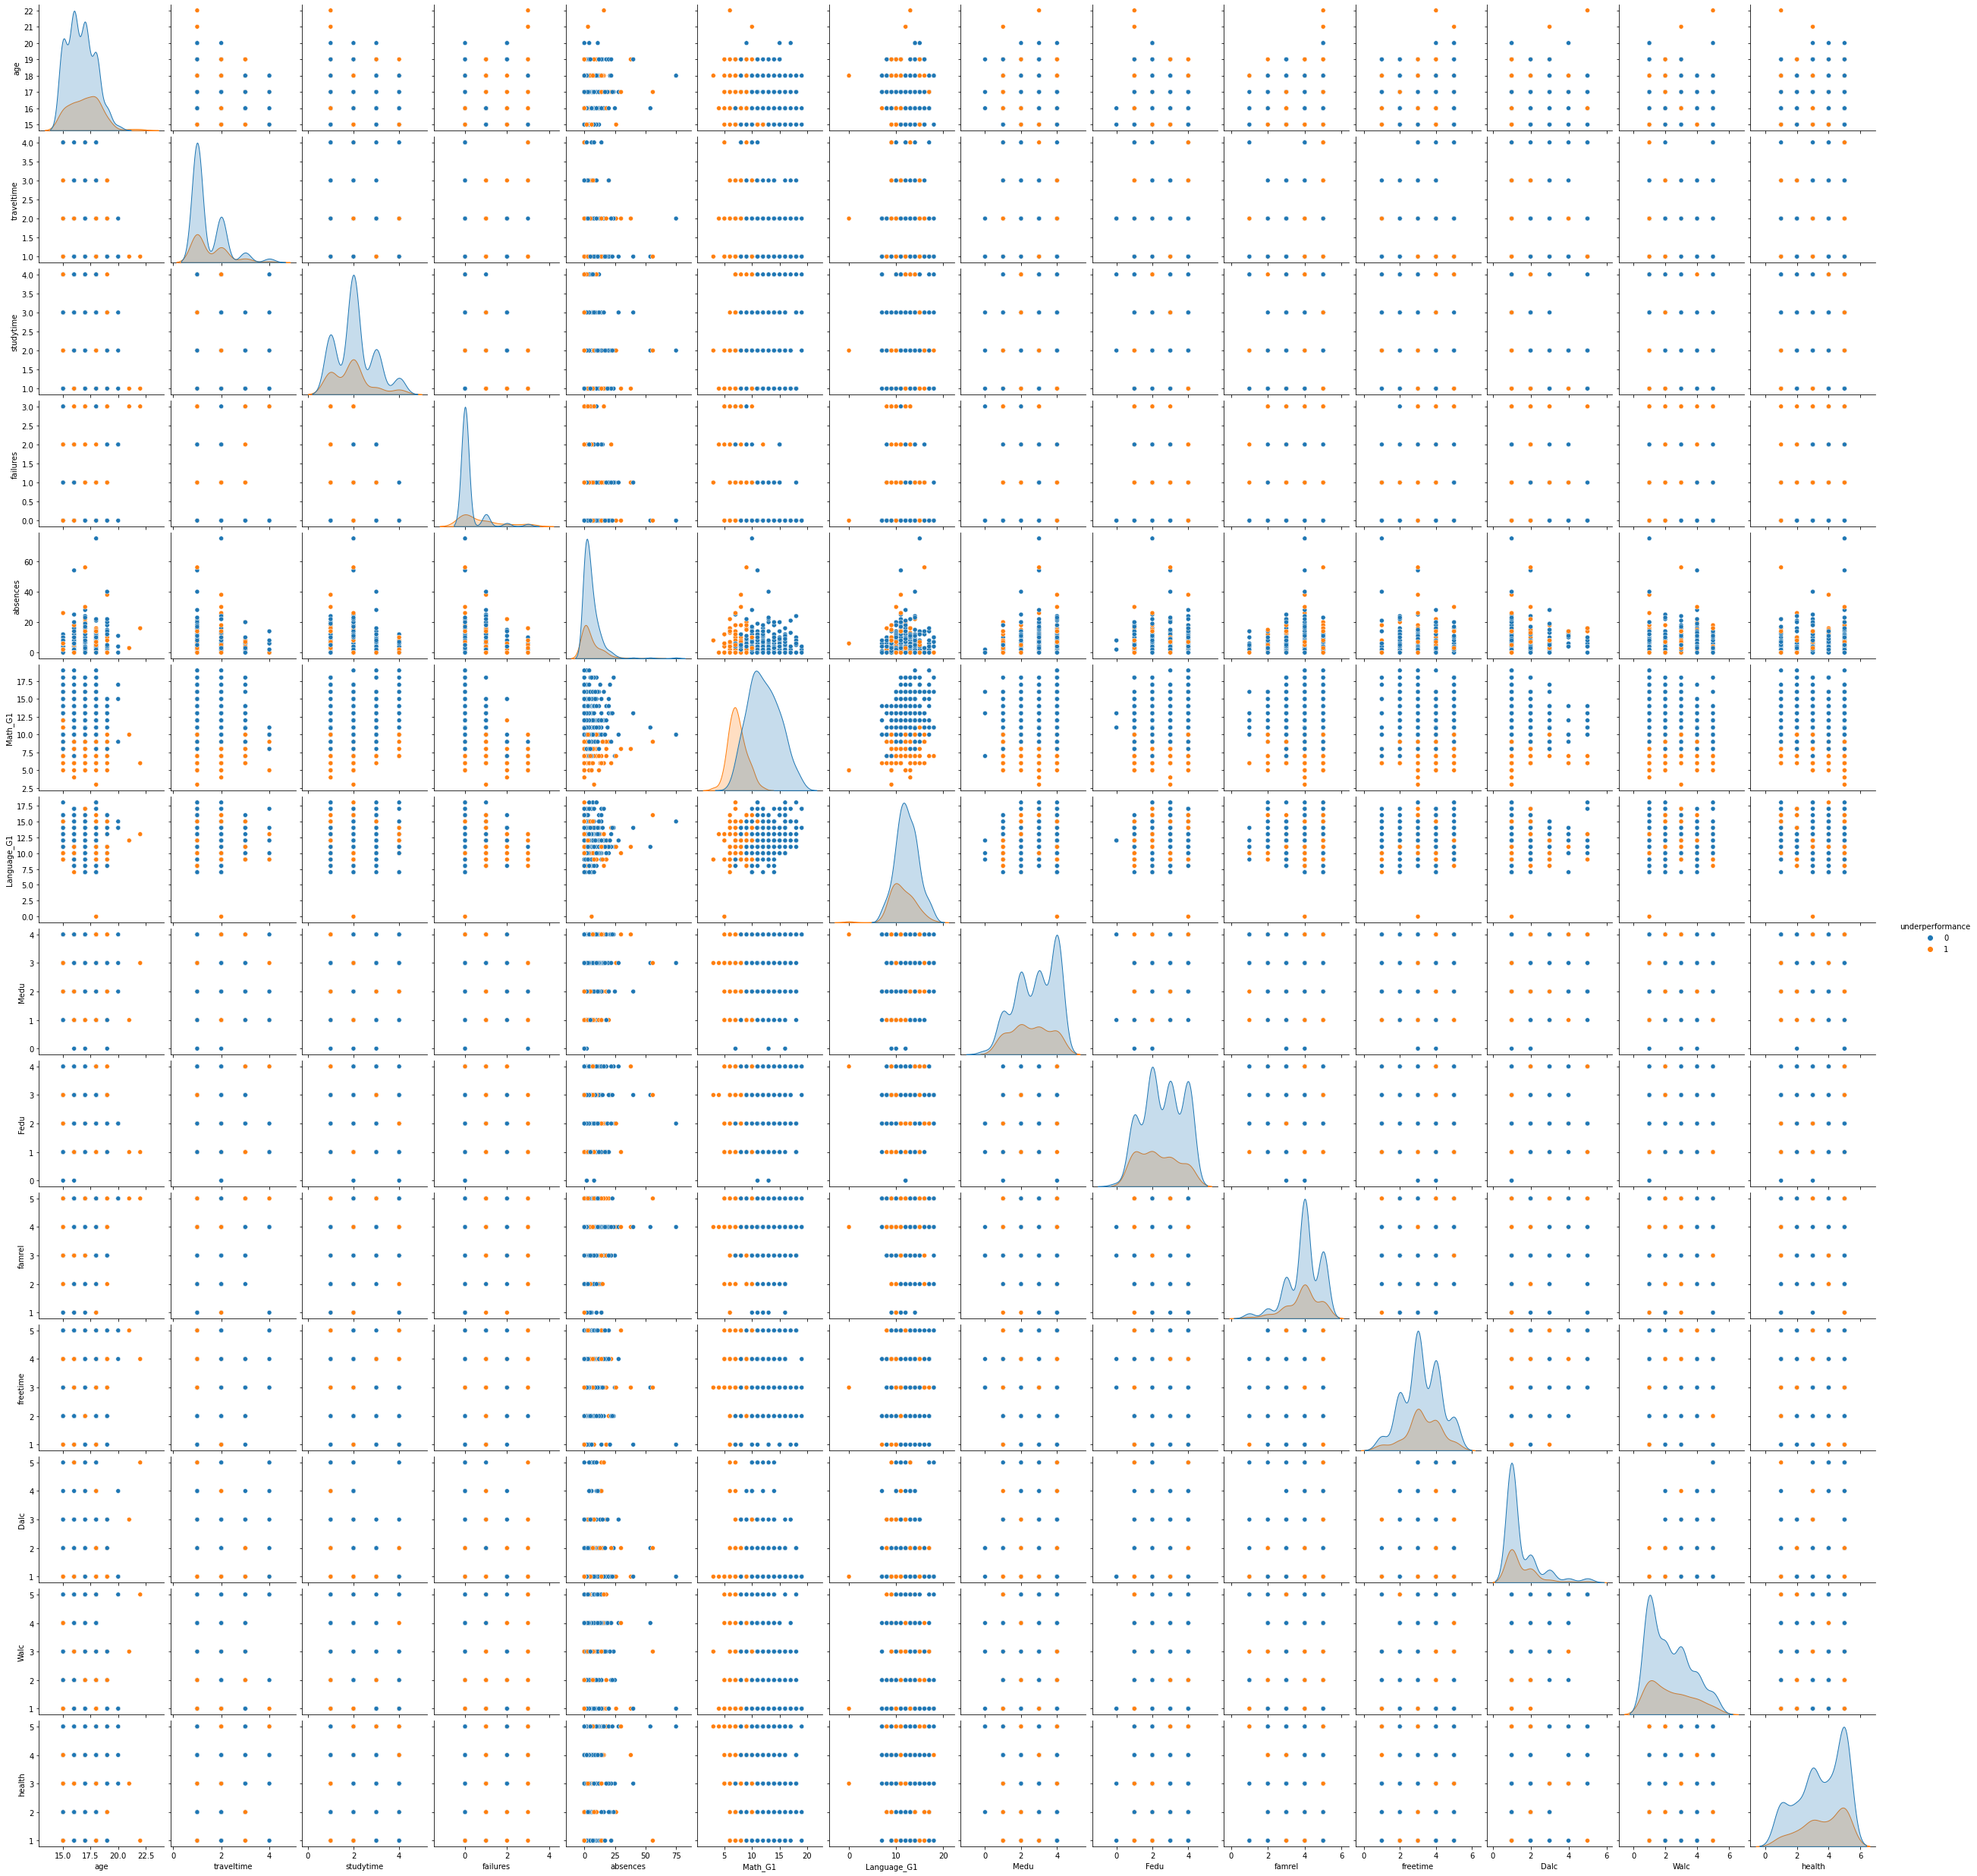

In [39]:
sns.pairplot(data=df, hue = 'underperformance') 

### Purpose here is just to explore the dataset a bit

<AxesSubplot:xlabel='failures', ylabel='age'>

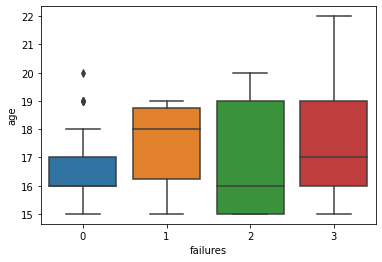

In [40]:
sns.boxplot(x = 'failures', y = 'age', data = df)

<AxesSubplot:xlabel='studytime', ylabel='age'>

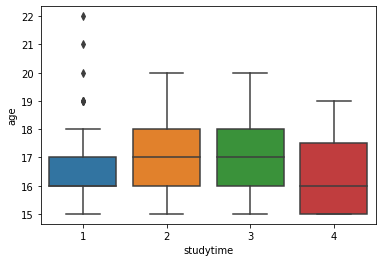

In [41]:
sns.boxplot(x = 'studytime', y = 'age', data = df)

<AxesSubplot:xlabel='underperformance', ylabel='count'>

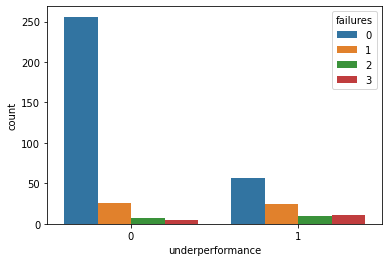

In [42]:
sns.countplot(x="underperformance", hue="failures", data=df)

The ratio for those who had not failed a class (blue bar) to those who HAD failed a class is CLOSER for students who had underperformed. Meaning students who underperformed are MORE likely to fail a class

# Task 3 - setup dummy variables to take care categorical variables

### Decided to do this tasks before seperating the data set into training and testing

In [43]:
df.head(10)

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,underperformance
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,1
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,1
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,0
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,0
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,0
5,16.0,1,2,0,10,15.0,12,M,U,LE3,...,yes,yes,yes,yes,5,4,1,2,5,0
6,16.0,1,2,0,0,12.0,13,M,U,LE3,...,no,no,yes,yes,4,4,1,1,3,0
7,17.0,2,2,0,6,6.0,10,F,U,GT3,...,no,no,yes,no,4,1,1,1,1,1
8,15.0,1,2,0,0,16.0,15,M,U,LE3,...,yes,no,yes,yes,4,2,1,1,1,0
9,15.0,1,2,0,0,14.0,12,M,U,GT3,...,yes,yes,yes,yes,5,5,1,1,5,0


In [44]:
sex = pd.get_dummies(df['sex'])
sex.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [45]:
df = pd.concat([df, sex], axis = 1)
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,higher,internet,famrel,freetime,Dalc,Walc,health,underperformance,F,M
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,yes,no,4,3,1,1,3,1,1,0
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,yes,yes,5,3,1,1,3,1,1,0
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,yes,4,3,2,3,3,0,1,0
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,3,2,1,1,5,0,1,0
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,4,3,1,2,5,0,1,0


#### Altering and dropping some columns

In [46]:
address = pd.get_dummies(df['address'])
famsize = pd.get_dummies(df['famsize'])
Pstatus = pd.get_dummies(df['Pstatus'])
Mjob = pd.get_dummies(df['Mjob'])
Fjob = pd.get_dummies(df['Fjob'])

df = df.drop(['sex', 'famsize', 'address','Pstatus','Mjob', 'Fjob', 'Dalc', 'Walc', 'famrel'], axis=1)

df = pd.concat([df, address, famsize, Pstatus, Mjob, Fjob], axis = 1)

df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,at_home,health,other,services,teacher,at_home,health,other,services,teacher
0,18.0,2,2,0,6,5.0,0,4,4,yes,...,1,0,0,0,0,0,0,0,0,1
1,17.0,1,2,0,4,5.0,9,1,1,no,...,1,0,0,0,0,0,0,1,0,0
2,15.0,1,2,3,10,7.0,12,1,1,yes,...,1,0,0,0,0,0,0,1,0,0
3,15.0,1,3,0,2,15.0,14,4,2,no,...,0,1,0,0,0,0,0,0,1,0
4,16.0,1,2,0,4,6.0,11,3,3,no,...,0,0,1,0,0,0,0,1,0,0


In [47]:
df['famsup'].head(10)

0     no
1    yes
2     no
3    yes
4    yes
5    yes
6     no
7    yes
8    yes
9    yes
Name: famsup, dtype: object

In [48]:
def yes_or_no(x):
    if x == 'yes': 
        return 1
    else: 
        return 0

# All columns that are yes and no.
df['schoolsup'] = df['schoolsup'].apply(yes_or_no)
df['famsup'] = df['famsup'].apply(yes_or_no)
df['paid'] = df['paid'].apply(yes_or_no)
df['activities'] = df['activities'].apply(yes_or_no)
df['higher'] = df['higher'].apply(yes_or_no)
df['internet'] = df['internet'].apply(yes_or_no)

In [49]:
# Testing if function is applied, and yes it works!
df['famsup'].head(10)

0    0
1    1
2    0
3    1
4    1
5    1
6    0
7    1
8    1
9    1
Name: famsup, dtype: int64

In [50]:
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,at_home,health,other,services,teacher,at_home,health,other,services,teacher
0,18.0,2,2,0,6,5.0,0,4,4,1,...,1,0,0,0,0,0,0,0,0,1
1,17.0,1,2,0,4,5.0,9,1,1,0,...,1,0,0,0,0,0,0,1,0,0
2,15.0,1,2,3,10,7.0,12,1,1,1,...,1,0,0,0,0,0,0,1,0,0
3,15.0,1,3,0,2,15.0,14,4,2,0,...,0,1,0,0,0,0,0,0,1,0
4,16.0,1,2,0,4,6.0,11,3,3,0,...,0,0,1,0,0,0,0,1,0,0


In [51]:
df.dtypes

age                 float64
traveltime            int64
studytime             int64
failures              int64
absences              int64
Math_G1             float64
Language_G1           int64
Medu                  int64
Fedu                  int64
schoolsup             int64
famsup                int64
paid                  int64
activities            int64
higher                int64
internet              int64
freetime              int64
health                int64
underperformance      int64
F                     uint8
M                     uint8
R                     uint8
U                     uint8
GT3                   uint8
LE3                   uint8
A                     uint8
T                     uint8
at_home               uint8
health                uint8
other                 uint8
services              uint8
teacher               uint8
at_home               uint8
health                uint8
other                 uint8
services              uint8
teacher             

# Task 4 - Normalize the data set

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'Medu', 'Fedu', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'freetime', 'health',
       'underperformance', 'F', 'M', 'R', 'U', 'GT3', 'LE3', 'A', 'T',
       'at_home', 'health', 'other', 'services', 'teacher', 'at_home',
       'health', 'other', 'services', 'teacher'],
      dtype='object')

In [72]:

cols = ['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'Medu', 'Fedu', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'freetime', 'health',
       'underperformance', 'F', 'M', 'R', 'U', 'GT3', 'LE3', 'A', 'T',
       'at_home', 'health', 'other', 'services', 'teacher', 'at_home',
       'health', 'other', 'services', 'teacher']

scaler = MinMaxScaler()

df[cols] = scaler.fit_transform(df[cols])
df.describe()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,at_home,health,other,services,teacher,at_home,health,other,services,teacher
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,...,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,0.242424,0.150673,0.344276,0.111111,0.075926,0.494305,0.667228,0.687500,0.630051,0.128788,...,0.148990,0.085859,0.356061,0.262626,0.146465,0.050505,0.045455,0.550505,0.280303,0.073232
std,0.182074,0.233658,0.279930,0.247633,0.106641,0.207187,0.134406,0.273355,0.271785,0.335389,...,0.356529,0.280510,0.479439,0.440618,0.354019,0.219262,0.208562,0.498072,0.449715,0.260847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.000000,0.000000,0.312500,0.555556,0.500000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.285714,0.000000,0.333333,0.000000,0.053333,0.500000,0.666667,0.750000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.428571,0.333333,0.333333,0.000000,0.106667,0.625000,0.777778,1.000000,0.750000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
df.head(5)

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,at_home,health,other,services,teacher,at_home,health,other,services,teacher
0,18.0,2,2,0,6,5.0,0,4,4,1,...,1,0,0,0,0,0,0,0,0,1
1,17.0,1,2,0,4,5.0,9,1,1,0,...,1,0,0,0,0,0,0,1,0,0
2,15.0,1,2,3,10,7.0,12,1,1,1,...,1,0,0,0,0,0,0,1,0,0
3,15.0,1,3,0,2,15.0,14,4,2,0,...,0,1,0,0,0,0,0,0,1,0
4,16.0,1,2,0,4,6.0,11,3,3,0,...,0,0,1,0,0,0,0,1,0,0


# Task 5 - Separate data set into training and testing

## Model for NO Math_G1 AND NO Language_G1

In [75]:
X = df.drop(['Math_G1', 'Language_G1', 'underperformance'], axis = 1)
Y = df['underperformance']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

### Logistic Regression

#### Build Model

In [76]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)

print(classification_report(Y_test, Y_pred))
print("accuracy score: ", accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.95      0.87        61
         1.0       0.57      0.21      0.31        19

    accuracy                           0.78        80
   macro avg       0.68      0.58      0.59        80
weighted avg       0.74      0.78      0.73        80

accuracy score:  0.775


In [77]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-Squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.225
Mean Squared Error: 0.225
Root Mean Squared Error (RMSE):  0.4743416490252569
R-Squared: -0.2424503882657465


### Cross-validation on No MATH_G1 and No Language_G1

#### 10-Fold Cross-Validation

In [95]:
import random
rsquare = []
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(classification_report(Y_test, Y_pred))
    print("accuracy score: ", accuracy_score(Y_test, Y_pred))
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    accuracy.append(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73        59
         1.0       0.12      0.10      0.11        21

    accuracy                           0.59        80
   macro avg       0.41      0.43      0.42        80
weighted avg       0.55      0.59      0.57        80

accuracy score:  0.5875
              precision    recall  f1-score   support

         0.0       0.73      0.87      0.80        54
         1.0       0.56      0.35      0.43        26

    accuracy                           0.70        80
   macro avg       0.65      0.61      0.61        80
weighted avg       0.68      0.70      0.68        80

accuracy score:  0.7
              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77        60
         1.0       0.25      0.20      0.22        20

    accuracy                           0.65        80
   macro avg       0.50      0.50      0.50        80
weighted avg       0.62      

<AxesSubplot:xlabel='trial'>

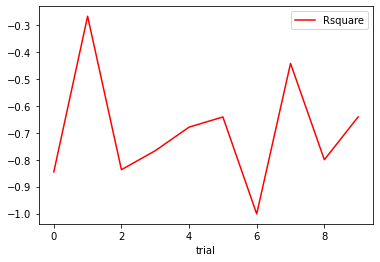

In [79]:
r_plot = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
r_plot.plot(x='trial', y='Rsquare', color = 'red')

In [60]:
print("Average Rsquare: {}".format(np.mean(rsquare)))

Average Rsquare: -0.5915413212228563


<AxesSubplot:xlabel='trial'>

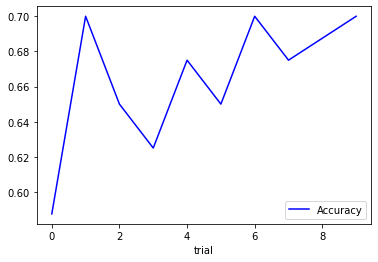

In [96]:
r_plot = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
r_plot.plot(x='trial', y='Accuracy', color = 'blue')

In [97]:
print("Average Accuracy: {}".format(np.mean(accuracy)))

Average Accuracy: 0.665


**Analysis:** This model indicates that the model is not reliable. Based on our cross-validation test there is no consistent R-squared that would indicate that this is a good model. The precision, recall, and f1-score were all good for case 0, but were terrible for case 1. The overall accuracy score of the model was average

## Model for BOTH Math_G1 and Language_G1

In [80]:
X = df.drop(['underperformance'], axis = 1)
Y = df['underperformance']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

### Logistic Regression

#### Build Model

In [81]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)

print(classification_report(Y_test, Y_pred))
print("accuracy score: ", accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        61
         1.0       0.69      0.58      0.63        19

    accuracy                           0.84        80
   macro avg       0.78      0.75      0.76        80
weighted avg       0.83      0.84      0.83        80

accuracy score:  0.8375


In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-Squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.1625
Mean Squared Error: 0.1625
Root Mean Squared Error (RMSE):  0.4031128874149275
R-Squared: 0.10267471958584984


### Cross Validation on BOTH Math_G1 and Language_G1 Included

#### 10-Fold Cross Validation

In [85]:
import random
r1square = []
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(classification_report(Y_test, Y_pred))
    print("accuracy score: ", accuracy_score(Y_test, Y_pred))
    r1square.append(metrics.r2_score(Y_test, Y_pred))
    accuracy.append(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71        57
         1.0       0.12      0.09      0.10        23

    accuracy                           0.56        80
   macro avg       0.40      0.42      0.41        80
weighted avg       0.51      0.56      0.54        80

accuracy score:  0.5625
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        64
         1.0       0.19      0.19      0.19        16

    accuracy                           0.68        80
   macro avg       0.49      0.49      0.49        80
weighted avg       0.68      0.68      0.68        80

accuracy score:  0.675
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77        64
         1.0       0.06      0.06      0.06        16

    accuracy                           0.62        80
   macro avg       0.41      0.41      0.41        80
weighted avg       0.62    

<AxesSubplot:xlabel='trial'>

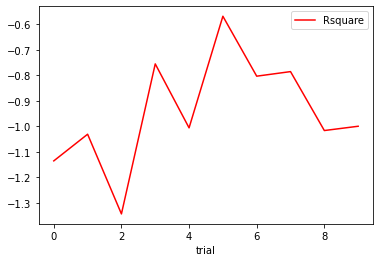

In [86]:
r_plot = pd.DataFrame( {'trial': range(10), 'Rsquare': r1square})
r_plot.plot(x='trial', y='Rsquare', color = 'red')

In [66]:
print("Average Rsquare: {}".format(np.mean(rsquare)))

Average Rsquare: -0.5915413212228563


<AxesSubplot:xlabel='trial'>

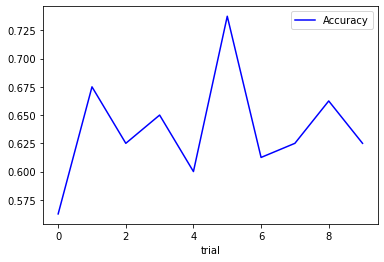

In [87]:
r_plot = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
r_plot.plot(x='trial', y='Accuracy', color = 'blue')

In [89]:
print("Average Accuracy: {}".format(np.mean(accuracy)))

Average Accuracy: 0.6375


**Analysis:** Similar to the first logistic regression model, this model is also not reliable. Based on our cross-validation test there is no consistent R-squared that would indicate that this is a good model. The precision, recall, and f1-score were still good for case 0. For case 1, it seems the results were similar to the No Math_G1 and Language_G1 results in terms of precision, recall, and f1-score. The accuracy score for the model was average

## Model for Math_G1 and NOT Language_G1

In [67]:
X = df.drop(['Math_G1', 'underperformance'], axis = 1)
Y = df['underperformance']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#### Build Model

In [68]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)

print(classification_report(Y_test, Y_pred))
print("accuracy score: ", accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91        65
           1       0.62      0.33      0.43        15

    accuracy                           0.84        80
   macro avg       0.74      0.64      0.67        80
weighted avg       0.82      0.84      0.82        80

accuracy score:  0.8375


In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-Squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.1625
Mean Squared Error: 0.1625
Root Mean Squared Error (RMSE):  0.4031128874149275
R-Squared: -0.06666666666666665


### Cross Validation on Math_G1 and NOT Language_G1 

#### 10-Fold Cross Validation

In [90]:
import random
r2square = []
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(classification_report(Y_test, Y_pred))
    print("accuracy score: ", accuracy_score(Y_test, Y_pred))
    r2square.append(metrics.r2_score(Y_test, Y_pred))
    accuracy.append(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77        58
         1.0       0.31      0.23      0.26        22

    accuracy                           0.65        80
   macro avg       0.52      0.52      0.52        80
weighted avg       0.62      0.65      0.63        80

accuracy score:  0.65
              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75        61
         1.0       0.12      0.11      0.11        19

    accuracy                           0.61        80
   macro avg       0.43      0.44      0.43        80
weighted avg       0.59      0.61      0.60        80

accuracy score:  0.6125
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79        60
         1.0       0.31      0.25      0.28        20

    accuracy                           0.68        80
   macro avg       0.54      0.53      0.53        80
weighted avg       0.65     

<AxesSubplot:xlabel='trial'>

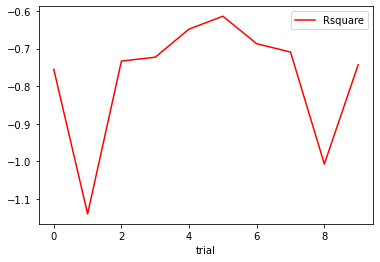

In [91]:
r_plot = pd.DataFrame( {'trial': range(10), 'Rsquare': r2square})
r_plot.plot(x='trial', y='Rsquare', color = 'red')

In [93]:
print("Average Rsquare: {}".format(np.mean(rsquare)))

Average Rsquare: -0.6919002299944219


<AxesSubplot:xlabel='trial'>

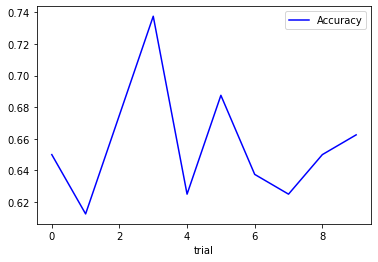

In [92]:
r_plot = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
r_plot.plot(x='trial', y='Accuracy', color = 'blue')

In [94]:
print("Average Accuracy: {}".format(np.mean(accuracy)))

Average Accuracy: 0.65625


**Analysis:** Similar to the first two logistic regression model, this model is also not reliable. However, this model is closer in terms of R-squared and less speradic. The precision, recall, and f1-score were still good for case 0. For case 1, it seems the results were similar to the No Math_G1 and Language_G1 results in terms of precision, recall, and f1-score. The accuracy score of the overall model was average

### Because I believe the previous model was inconclusive with the results, lets try another model

### Naive Bayes Classifier

### Model for NO Math_G1 and NO Language_G1 

In [98]:
X = df.drop(['underperformance'], axis = 1)
Y = df['underperformance']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

#### Build Model

In [103]:
# Fit a Naive Bayes model to the data
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

In [105]:
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87        61
         1.0       0.58      0.79      0.67        19

    accuracy                           0.81        80
   macro avg       0.75      0.80      0.77        80
weighted avg       0.84      0.81      0.82        80

0.8125


In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('R-Squared:', metrics.r2_score(Y_test, predictions))

Mean Absolute Error: 0.1875
Mean Squared Error: 0.1875
Root Mean Squared Error (RMSE):  0.4330127018922193
R-Squared: -0.035375323554788674


### Cross Validation on NO Math_G1 and NO Language_G1

#### 10-Fold Cross Validation

In [107]:
r2square = []
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = GaussianNB()
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    print(classification_report(Y_test, predictions))
    print("accuracy score: ", accuracy_score(Y_test, predictions))
    r2square.append(metrics.r2_score(Y_test, predictions))
    accuracy.append(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87        62
         1.0       0.56      0.50      0.53        18

    accuracy                           0.80        80
   macro avg       0.71      0.69      0.70        80
weighted avg       0.79      0.80      0.80        80

accuracy score:  0.8
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83        61
         1.0       0.48      0.63      0.55        19

    accuracy                           0.75        80
   macro avg       0.68      0.71      0.69        80
weighted avg       0.78      0.75      0.76        80

accuracy score:  0.75
              precision    recall  f1-score   support

         0.0       0.79      0.76      0.77        54
         1.0       0.54      0.58      0.56        26

    accuracy                           0.70        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.71      0.

<AxesSubplot:xlabel='trial'>

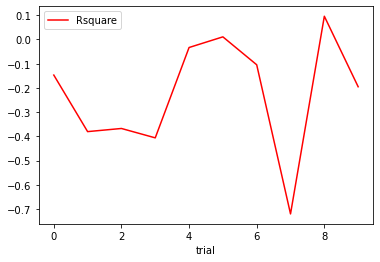

In [108]:
r_plot = pd.DataFrame( {'trial': range(10), 'Rsquare': r2square})
r_plot.plot(x='trial', y='Rsquare', color = 'red')

In [109]:
print("Average Rsquare: {}".format(np.mean(rsquare)))

Average Rsquare: -0.8462570099711743


<AxesSubplot:xlabel='trial'>

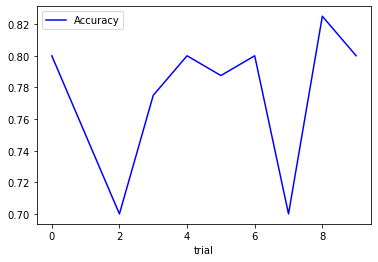

In [110]:
r_plot = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
r_plot.plot(x='trial', y='Accuracy', color = 'blue')

In [111]:
print("Average Accuracy: {}".format(np.mean(accuracy)))

Average Accuracy: 0.77375


**Analysis:** Compared to the same model but in the logisitic regression form, we can see that the accuracy score has improved. We can also see that the precision, recall, and f1-score for BOTH cases this time has improved and are good. 

## Model for BOTH Math_G1 and Language_G1

In [112]:
X = df.drop(['underperformance'], axis = 1)
Y = df['underperformance']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

#### Build Model

In [113]:
# Fit a Naive Bayes model to the data
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

In [114]:
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87        61
         1.0       0.58      0.79      0.67        19

    accuracy                           0.81        80
   macro avg       0.75      0.80      0.77        80
weighted avg       0.84      0.81      0.82        80

0.8125


### Cross Validation

#### 10-Fold Cross-Validation

In [115]:
r2square = []
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = GaussianNB()
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    print(classification_report(Y_test, predictions))
    print("accuracy score: ", accuracy_score(Y_test, predictions))
    r2square.append(metrics.r2_score(Y_test, predictions))
    accuracy.append(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84        63
         1.0       0.45      0.59      0.51        17

    accuracy                           0.76        80
   macro avg       0.67      0.70      0.68        80
weighted avg       0.79      0.76      0.77        80

accuracy score:  0.7625
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90        63
         1.0       0.61      0.65      0.63        17

    accuracy                           0.84        80
   macro avg       0.76      0.77      0.76        80
weighted avg       0.84      0.84      0.84        80

accuracy score:  0.8375
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        61
         1.0       0.63      0.63      0.63        19

    accuracy                           0.82        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.82   

<AxesSubplot:xlabel='trial'>

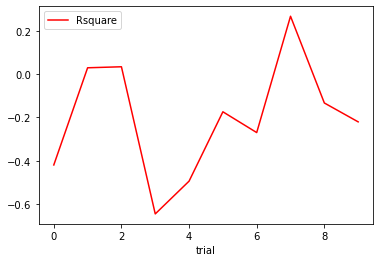

In [116]:
r_plot = pd.DataFrame( {'trial': range(10), 'Rsquare': r2square})
r_plot.plot(x='trial', y='Rsquare', color = 'red')

In [117]:
print("Average Rsquare: {}".format(np.mean(rsquare)))

Average Rsquare: -0.8462570099711743


<AxesSubplot:xlabel='trial'>

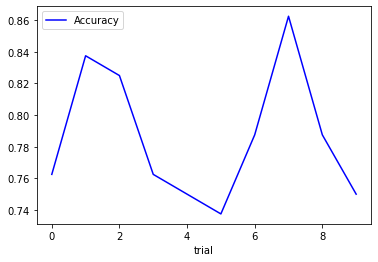

In [118]:
r_plot = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
r_plot.plot(x='trial', y='Accuracy', color = 'blue')

In [119]:
print("Average Accuracy: {}".format(np.mean(accuracy)))

Average Accuracy: 0.78625


**Analysis:** Compared to the same model but in the logisitic regression form and also compared to the previous Naives Bayes model, we can see that the accuracy score has improved again. We can also see that the precision, recall, and f1-score for BOTH cases this time has improved and are good. 

## Model for Math_G1 and NOT Language_G1

In [120]:
X = df.drop(['Math_G1', 'underperformance'], axis = 1)
Y = df['underperformance']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [121]:
# Fit a Naive Bayes model to the data
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

In [122]:
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.71      0.79        65
         1.0       0.32      0.60      0.42        15

    accuracy                           0.69        80
   macro avg       0.60      0.65      0.60        80
weighted avg       0.78      0.69      0.72        80

0.6875


### Cross Validation

#### 10-Fold Cross Validation

In [123]:
r2square = []
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = GaussianNB()
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    print(classification_report(Y_test, predictions))
    print("accuracy score: ", accuracy_score(Y_test, predictions))
    r2square.append(metrics.r2_score(Y_test, predictions))
    accuracy.append(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79        54
         1.0       0.57      0.62      0.59        26

    accuracy                           0.73        80
   macro avg       0.69      0.70      0.69        80
weighted avg       0.73      0.72      0.73        80

accuracy score:  0.725
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80        59
         1.0       0.45      0.48      0.47        21

    accuracy                           0.71        80
   macro avg       0.63      0.64      0.63        80
weighted avg       0.72      0.71      0.71        80

accuracy score:  0.7125
              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77        63
         1.0       0.26      0.35      0.30        17

    accuracy                           0.65        80
   macro avg       0.53      0.54      0.53        80
weighted avg       0.69    

## WRONG

Cross Validation	-5	

It's classification problem,shouldn't look at R-square

<AxesSubplot:xlabel='trial'>

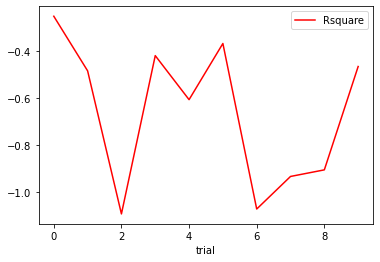

In [124]:
r_plot = pd.DataFrame( {'trial': range(10), 'Rsquare': r2square})
r_plot.plot(x='trial', y='Rsquare', color = 'red')

In [125]:
print("Average Rsquare: {}".format(np.mean(rsquare)))

Average Rsquare: -0.8462570099711743


<AxesSubplot:xlabel='trial'>

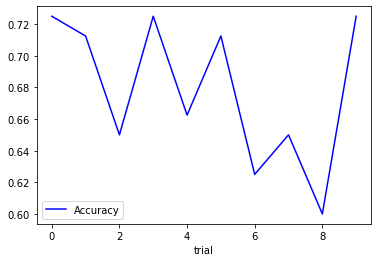

In [126]:
r_plot = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
r_plot.plot(x='trial', y='Accuracy', color = 'blue')

In [127]:
print("Average Accuracy: {}".format(np.mean(accuracy)))

Average Accuracy: 0.67875


**Analysis:** Compared to the previous 2 Naive Bayes models and the same model we can see that the accuracy and R-squared are both low and more spradic. Including the precision, recall, and f1-score.

## Final Comments

I believe that the Language Grade WILL NOT be helpful to catch underperformance in the final Math Grade because based on the 2 different models we've used (Logistic Regression, Naive Bayes Classifier), in the cases where we included Language_G1 we do see an increase in the accuracy score, however, the R-Squared and accuracy scores are still a bit sparadic to the point where I believe the results would be inconclusive.

Based on the 3 Logistic Reggression Models and 3 Naive Bayes Classifier models, it seems that Naive Bayes Classifier model #2 (The model that featured BOTH Math_G1 and Language_G1) generated the BEST accuracy score (Average Score of 78.6%) and best f1-score (An f1-score that topped at 91%).